In [2]:
import os
import pandas as pd
import requests
from pathlib import Path
from datetime import datetime
from dotenv import load_dotenv
from bs4 import BeautifulSoup

RAW = Path("data/raw")
RAW.mkdir(parents=True, exist_ok=True)

load_dotenv()
print("ALPHAVANTAGE_API_KEY loaded?", bool(os.getenv("ALPHAVANTAGE_API_KEY")))

ALPHAVANTAGE_API_KEY loaded? True


In [ ]:
SYMBOL = "AMZN"  

api_key = os.getenv("ALPHAVANTAGE_API_KEY")

try:
    if api_key:  
        url = (
            f"https://www.alphavantage.co/query?"
            f"function=TIME_SERIES_DAILY&symbol={SYMBOL}&apikey={api_key}&outputsize=compact"
        )
        r = requests.get(url)
        print(r.json())
        data = r.json()["Time Series (Daily)"]

        df_api = pd.DataFrame.from_dict(data, orient="index").reset_index()
        df_api = df_api.rename(columns={"index": "date", "4. close": "adj_close"})
        df_api["date"] = pd.to_datetime(df_api["date"])
        df_api["adj_close"] = pd.to_numeric(df_api["adj_close"])

    else:  
        import yfinance as yf
        df_api = yf.download(SYMBOL, period="3mo", interval="1d", auto_adjust=False).reset_index()
        df_api = df_api[["Date", "Adj Close"]].rename(columns={"Date": "date", "Adj Close": "adj_close"})

    assert "date" in df_api.columns
    assert "adj_close" in df_api.columns
    assert df_api.shape[0] > 0
    assert df_api["adj_close"].notna().all()

    ts = datetime.now().strftime("%Y%m%d-%H%M")
    out_path = RAW / f"api_yfinance_{SYMBOL}_{ts}.csv"
    df_api.to_csv(out_path, index=False)
    print(f"✅ API data saved to {out_path}")

except Exception as e:
    print("❌ API failed to obtain", e)


{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'AMZN', '3. Last Refreshed': '2025-08-18', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2025-08-18': {'1. open': '230.2250', '2. high': '231.9100', '3. low': '228.3300', '4. close': '231.4900', '5. volume': '25248890'}, '2025-08-15': {'1. open': '232.5800', '2. high': '234.0800', '3. low': '229.8070', '4. close': '231.0300', '5. volume': '39649244'}, '2025-08-14': {'1. open': '227.4000', '2. high': '233.1100', '3. low': '227.0200', '4. close': '230.9800', '5. volume': '61545824'}, '2025-08-13': {'1. open': '222.0000', '2. high': '224.9185', '3. low': '222.0000', '4. close': '224.5600', '5. volume': '36508335'}, '2025-08-12': {'1. open': '222.2300', '2. high': '223.5000', '3. low': '219.0500', '4. close': '221.4700', '5. volume': '37254707'}, '2025-08-11': {'1. open': '221.7800', '2. high': '223.0500', '3. low': '220.4000', '4. close': '221.3000', '5

In [ ]:
df = df_api.copy()

assert "date" in df.columns, "Missing 'date' column"
assert "adj_close" in df.columns or "close" in df.columns, "Missing price column"

assert df.shape[0] > 0, "DataFrame is empty"

assert df.dropna().shape[0] == df.shape[0], "Found NaN values"

print("✅ Data validation passed!")

✅ Data validation passed!


In [ ]:
from pathlib import Path
from datetime import datetime

PROCESSED = Path("data/processed")
PROCESSED.mkdir(parents=True, exist_ok=True)

ts = datetime.now().strftime("%Y%m%d-%H%M")
out_path = PROCESSED / f"processed_AMZN_{ts}.csv"
df.to_csv(out_path, index=False)

print(f"✅ Clean data saved to {out_path}")

✅ Clean data saved to data/processed/processed_AMZN_20250819-0957.csv


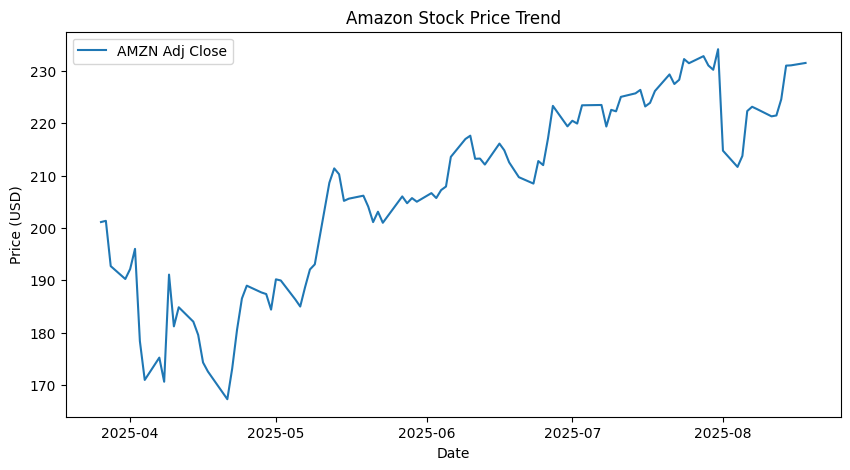

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df["date"], df["adj_close"], label="AMZN Adj Close")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Amazon Stock Price Trend")
plt.legend()
plt.show()

In [ ]:
import yfinance as yf
SYMBOL = "AMZN"
df_api = yf.download(SYMBOL, period="3mo", interval="1d").reset_index()
df_api = df_api[["Date", "Close"]].rename(columns={"Date": "date", "Adj Close": "adj_close"})

/var/folders/kv/6rqz29bj6dl7ymv80p95tqfc0000gn/T/ipykernel_52525/726351120.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_api = yf.download(SYMBOL, period="3mo", interval="1d").reset_index()
[*********************100%***********************]  1 of 1 completed
